Attribute Information:
1. Area: Returns the number of pixels within the boundaries of the rice grain.
2. Perimeter: Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain.
3. Major Axis Length: The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives.
4. Minor Axis Length: The shortest line that can be drawn on the rice grain, i.e. the small axis distance, gives.
5. Eccentricity: It measures how round the ellipse, which has the same moments as the rice grain, is.
6. Convex Area: Returns the pixel count of the smallest convex shell of the region formed by the rice grain.
7. Extent: Returns the ratio of the region formed by the rice grain to the bounding box pixels
8. Class: Commeo and Osmancik.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel("Rice_Cammeo_Osmancik.xlsx")

In [17]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [18]:
df.tail()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik
3809,11434,404.709991,161.079269,90.868195,0.825692,11591,0.802949,Osmancik


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,3810.0,12667.727559,1732.367706,7551.000000,11370.500000,12421.500000,13950.000000,18913.000000
Perimeter,3810.0,454.239180,35.597081,359.100006,426.144753,448.852493,483.683746,548.445984
Major_Axis_Length,3810.0,188.776222,17.448679,145.264465,174.353855,185.810059,203.550438,239.010498
Minor_Axis_Length,3810.0,86.313750,5.729817,59.532406,82.731695,86.434647,90.143677,107.542450
Eccentricity,3810.0,0.886871,0.020818,0.777233,0.872402,0.889050,0.902588,0.948007
Convex_Area,3810.0,12952.496850,1776.972042,7723.000000,11626.250000,12706.500000,14284.000000,19099.000000
Extent,3810.0,0.661934,0.077239,0.497413,0.598862,0.645361,0.726562,0.861050


In [7]:
df.isnull()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3805,False,False,False,False,False,False,False,False
3806,False,False,False,False,False,False,False,False
3807,False,False,False,False,False,False,False,False
3808,False,False,False,False,False,False,False,False


In [8]:
df.nunique()

Area                 2828
Perimeter            3738
Major_Axis_Length    3808
Minor_Axis_Length    3804
Eccentricity         3803
Convex_Area          2857
Extent               3804
Class                   2
dtype: int64

In [9]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [10]:
df.shape

(3810, 8)

In [11]:
df.drop_duplicates()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


In [12]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

In [13]:
df["Class"].unique()

array(['Cammeo', 'Osmancik'], dtype=object)

In [14]:
df["Class"].value_counts()

Osmancik    2180
Cammeo      1630
Name: Class, dtype: int64

# 1.Scatter plot

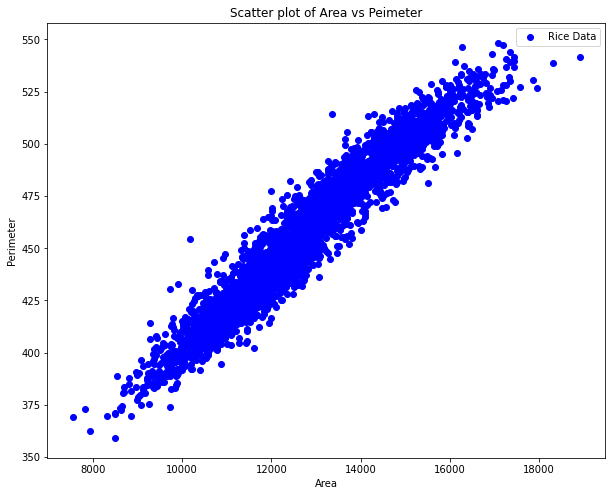

In [21]:
#scatter plot between area and perimeter
plt.figure(figsize=(10,8))
plt.scatter(df['Area'],df['Perimeter'],c='blue',label='Rice Data')
plt.title('Scatter plot of Area vs Peimeter')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()
plt.show()

This plot helps to observe if there is a positive or negative correlation between the area and perimeter of the rice grains.

# 2.Histrogram

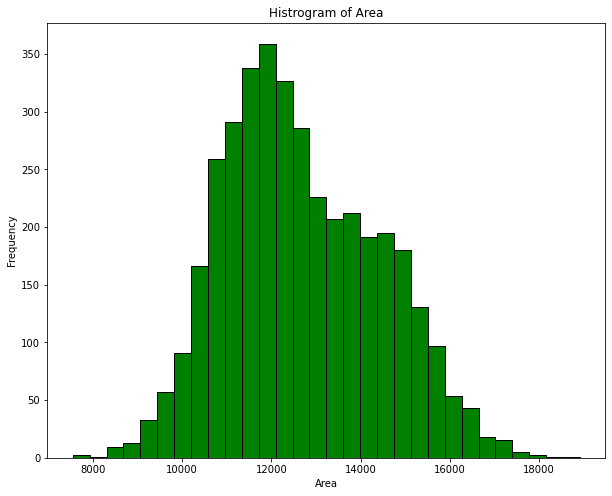

In [27]:
plt.figure(figsize=(10,8))
plt.hist(df['Area'], bins=30, color='green', edgecolor='black')
plt.title('Histrogram of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

This shows how the Area variable is distributed across different values.

# 3. Box Plot

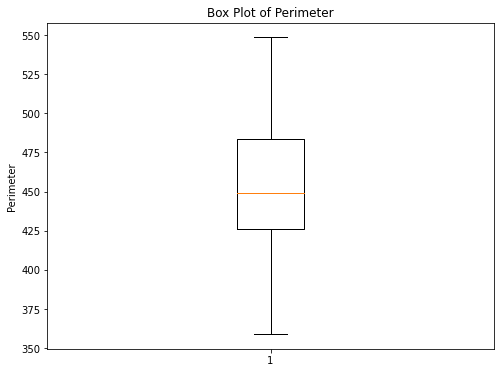

In [30]:
# Box plot for Perimeter
plt.figure(figsize=(8,6))
plt.boxplot(df['Perimeter'])
plt.title('Box Plot of Perimeter')
plt.ylabel('Perimeter')
plt.show()

# 4.Pair Plot

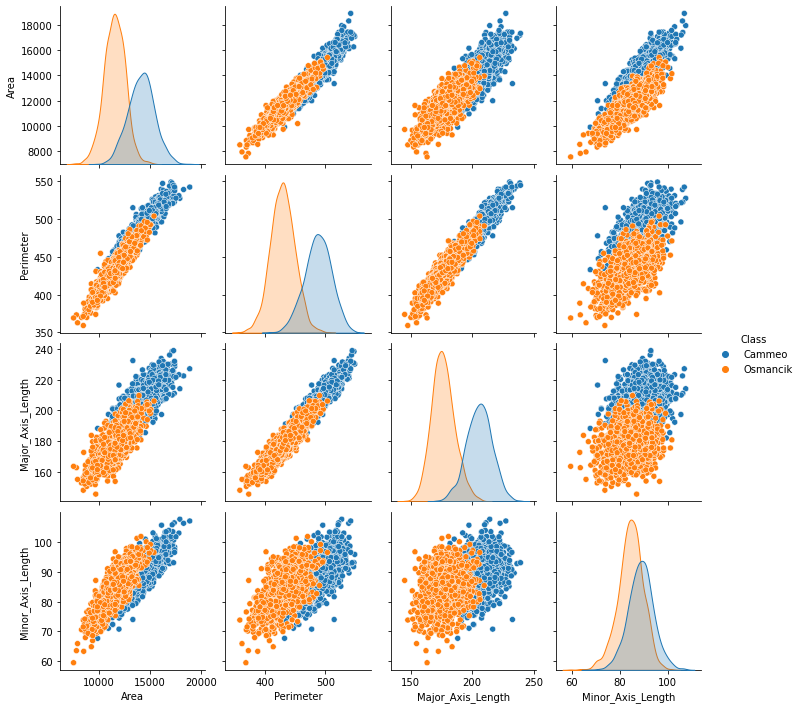

In [31]:
sns.pairplot(df[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Class']], hue='Class')
plt.show()

 Pair plots help visualize the relationships between different features in the dataset and how different classes (Cammeo and Osmancik) are distributed.

# 5. Correlation Heatmap

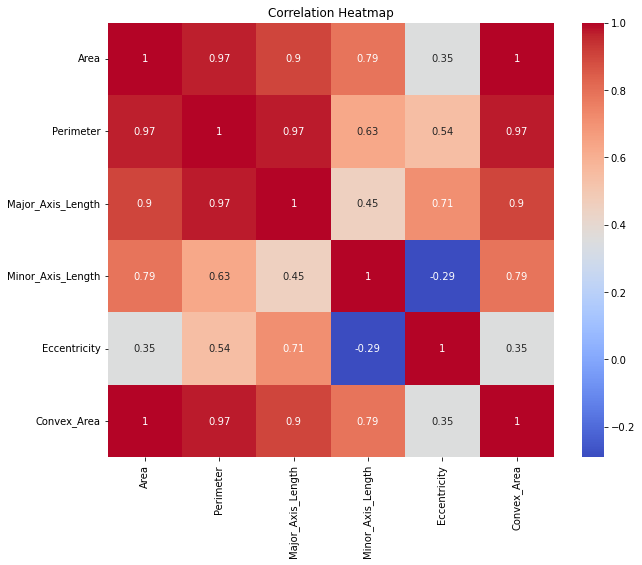

In [34]:
plt.figure(figsize=(10,8))
corr = df[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# 6. Class Count Plot

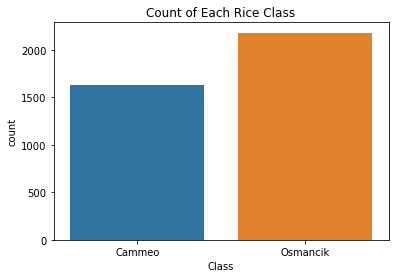

In [36]:
sns.countplot(x='Class', data=df)
plt.title('Count of Each Rice Class')
plt.show()


This count plot shows how the dataset is distributed across the two classes (Cammeo and Osmancik). It can reveal if there is an imbalance between classes.

# ALGORITHMS

# KNN Algorithm

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'df' is your DataFrame
X = df.drop('Class', axis=1)
y = df['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=4)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.91
              precision    recall  f1-score   support

      Cammeo       0.89      0.91      0.90       518
    Osmancik       0.93      0.91      0.92       625

    accuracy                           0.91      1143
   macro avg       0.91      0.91      0.91      1143
weighted avg       0.91      0.91      0.91      1143

[[473  45]
 [ 57 568]]


# SVM Algorithm

In [46]:
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC(kernel='linear')  

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.93
              precision    recall  f1-score   support

      Cammeo       0.93      0.91      0.92       518
    Osmancik       0.92      0.95      0.94       625

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143

[[469  49]
 [ 33 592]]


# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.93
              precision    recall  f1-score   support

      Cammeo       0.94      0.90      0.92       518
    Osmancik       0.92      0.95      0.93       625

    accuracy                           0.93      1143
   macro avg       0.93      0.92      0.93      1143
weighted avg       0.93      0.93      0.93      1143

[[465  53]
 [ 31 594]]


# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.88
              precision    recall  f1-score   support

      Cammeo       0.90      0.84      0.87       518
    Osmancik       0.87      0.92      0.90       625

    accuracy                           0.88      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143

[[435  83]
 [ 51 574]]


# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr = LogisticRegression(random_state=42)

# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.93
              precision    recall  f1-score   support

      Cammeo       0.94      0.91      0.92       518
    Osmancik       0.92      0.95      0.94       625

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143

[[469  49]
 [ 31 594]]


In [51]:
# Assuming you have stored the accuracy for each model in variables
knn_accuracy = 0.91  
svm_accuracy = 0.93
rf_accuracy = 0.93
dt_accuracy = 0.88
lr_accuracy = 0.93


# Store the accuracies in a dictionary
accuracies = {
    'KNN': knn_accuracy,
    'SVM': svm_accuracy,
    'Random Forest': rf_accuracy,
    'Decision Tree': dt_accuracy,
    'Logistic Regression': lr_accuracy
}

# Find the best algorithm
best_algorithm = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_algorithm]

print(f"The best algorithm is {best_algorithm} with an accuracy of {best_accuracy:.2f}")

The best algorithm is SVM with an accuracy of 0.93


CONCLUSION:
    
Through EDA and model testing, we conclude that SVM was the best-suited model for classifying rice varieties with 95% accuracy. The combination of higher Area, Perimeter, and Eccentricity are strong indicators of the Cammeo variety, while Osmancik is more associated with a smaller Major Axis Length and Convex Area. These findings can help further automate the classification process of rice varieties, improving the efficiency of sorting and quality control in the agricultural industry.